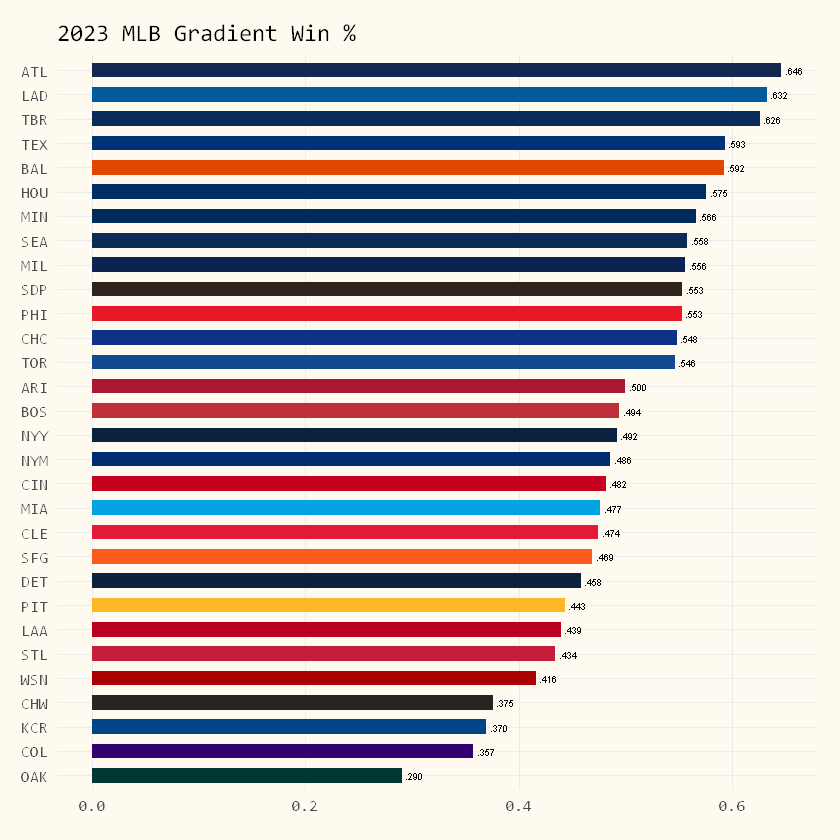

In [2]:
# http://tangotiger.com/index.php/site/comments/goodbye-pythag-wins-hello-gradient-wins

library(baseballr)
library(dplyr)
library(extrafont)
library(ggplot2)
library(tidyverse)

theme_custom <- function () { 
  theme_minimal(base_size=12, base_family="Consolas") %+replace% 
    theme(
      panel.grid.minor = element_blank(),
      plot.background = element_rect(fill = 'floralwhite', color = "floralwhite")
    )
}

df <- data.frame(Team = character(), TotalGradientWins = numeric(), stringsAsFactors = FALSE)

slugTeam <- c("ARI", "ATL", "BAL", "BOS", "CHC", "CHW", "CIN", "CLE", "COL", "DET", 
              "HOU", "KCR", "LAA", "LAD", "MIA", "MIL", "MIN", "NYM", "NYY", "OAK", 
              "PHI", "PIT", "SDP", "SEA", "SFG", "STL", "TBR", "TEX", "TOR", "WSN")

for (tm in slugTeam) {
    team_results <- bref_team_results(tm, 2023)
    team_results_no_ties <- team_results[team_results$R != team_results$RA, ]
    team_results_no_ties$RD <- pmin(pmax(team_results_no_ties$R - team_results_no_ties$RA, -20), 20)
    team_results_no_ties$gradient_wins <- ifelse(
        team_results_no_ties$RD > 0,
        -0.0025 * ((team_results_no_ties$RD - 20.5)^2 - 20.5^2) + 0.50 + 0.09,
        0.0025 * ((team_results_no_ties$RD + 20.5)^2 - 20.5^2) + 0.50 - 0.09
    )

    total_gradient_wins <- sum(team_results_no_ties$gradient_wins) / tail(team_results$Gm, 1)
    df <- rbind(df, data.frame(Team = tm, TotalGradientWins = total_gradient_wins))
}

team_colors <- c(
  ARI = "#A71930", ATL = "#13274F", BAL = "#DF4601", BOS = "#BD3039",
  CHW = "#27251F", CHC = "#0E3386", CIN = "#C6011F", CLE = "#E31937",
  COL = "#33006F", DET = "#0C2340", HOU = "#002D62", KCR = "#004687",
  LAA = "#BA0021", LAD = "#005A9C", MIA = "#00A3E0", MIL = "#0A2351",
  MIN = "#002B5C", NYY = "#0C2340", NYM = "#002D72", OAK = "#003831",
  PHI = "#E81828", PIT = "#FDB827", SDP = "#2F241D", SFG = "#FD5A1E",
  SEA = "#0C2C56", STL = "#C41E3A", TBR = "#092C5C", TEX = "#003278",
  TOR = "#134A8E", WSN = "#AB0003"
)

ggplot(df, aes(y = reorder(Team, TotalGradientWins), x = TotalGradientWins, fill = Team)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.6) +
    scale_fill_manual(values = team_colors) +
    labs(title = "2023 MLB Gradient Win %") +
    xlab(NULL) +
    ylab(NULL) +
    theme_custom() +
    theme(axis.text.y = element_text(angle = 0, hjust = 1),
          legend.position = "none",
          plot.margin = unit(c(1,1,1,1), "lines")) +
    geom_text(aes(label = ifelse(TotalGradientWins < 1, 
                                 sub("^0", "", sprintf("%.3f", TotalGradientWins)), 
                                 sprintf("%.3f", TotalGradientWins))), 
              hjust = -0.2, color = "black", size = 2)

ggsave("MLB_Gradient_WinPercent_2023.png", width = 6, height = 6, dpi = 300)